## PCA(主成分分析法)
1. 什么是主成分
- 数据的散度最大的维度

## PCA的算法流程
**例子：二维数据的主成分分析（PCA）降维到一维**
1. 数据标准化
假设我们有以下二维数据：
$$X = \begin{bmatrix}
2.5 & 2.4 \\
0.5 & 0.7 \\
2.2 & 2.9 \\
1.9 & 2.2 \\
3.1 & 3.0 \\
2.3 & 2.7 \\
2 & 1.6 \\
1 & 1.1 \\
1.5 & 1.6 \\
1.1 & 0.9
\end{bmatrix}$$
首先，我们需要对数据进行标准化处理，即每个特征（列）减去其均值并除以其标准差。
均值：$$\mu_x = \frac{1}{10} \sum_{i=1}^{10} x_i = 2, \quad \mu_y = \frac{1}{10} \sum_{i=1}^{10} y_i = 2$$
标准差：$$\sigma_x = \sqrt{\frac{1}{10} \sum_{i=1}^{10} (x_i - \mu_x)^2}, \quad \sigma_y = \sqrt{\frac{1}{10} \sum_{i=1}^{10} (y_i - \mu_y)^2}$$
标准化后的数据矩阵 $Z$ 为：
$$Z = \begin{bmatrix}
\frac{2.5 - 2}{\sigma_x} & \frac{2.4 - 2}{\sigma_y} \\
\frac{0.5 - 2}{\sigma_x} & \frac{0.7 - 2}{\sigma_y} \\
\vdots & \vdots \\
\frac{1.1 - 2}{\sigma_x} & \frac{0.9 - 2}{\sigma_y}
\end{bmatrix}$$
由于具体计算标准差的过程较为繁琐，在此省略，但标准化后的数据应类似于：
$$Z \approx \begin{bmatrix}
0.5 & 0.2 \\
-1.5 & -1.3 \\
0.2 & 0.9 \\
-0.3 & 0.2 \\
1.1 & 1.0 \\
0.3 & 0.7 \\
0 & -1.2 \\
-1 & -1.9 \\
-0.5 & -1.2 \\
-0.9 & -2.1
\end{bmatrix}$$

2. 计算协方差矩阵
协方差矩阵 $C$ 为：
$$C = \frac{1}{n-1} Z^T Z = \begin{bmatrix}
\text{cov}(x,x) & \text{cov}(x,y) \\
\text{cov}(y,x) & \text{cov}(y,y)
\end{bmatrix}$$
其中，$\text{cov}(x,x)$ 和 $\text{cov}(y,y)$ 分别是 $x$ 和 $y$ 的方差，$\text{cov}(x,y)$ 和 $\text{cov}(y,x)$ 是 $x$ 和 $y$ 的协方差。
 3. 特征值分解
对协方差矩阵 $C$ 进行特征值分解，得到特征值和特征向量。
$$C = U \Lambda U^T$$
其中，$U$ 是特征向量组成的矩阵，$\Lambda$ 是特征值组成的对角矩阵。
4. 选择主成分
选择最大的特征值对应的特征向量作为主成分。假设 $\lambda_1$ 是最大的特征值，$u_1$ 是对应的特征向量。
5. 数据投影
将标准化后的数据 $Z$ 投影到主成分 $u_1$ 上，得到降维后的数据。
$$Y = Z u_1$$
其中，$Y$ 是降维后的数据向量。
 **具体计算**
1. **标准化**：计算每个特征的均值和标准差，并对数据进行标准化。
2. **协方差矩阵**：
$$C = \begin{bmatrix}
0.61655556 & 0.61544444 \\
0.61544444 & 0.71655556
\end{bmatrix}$$
3. **特征值分解**：
特征值：$\lambda_1 = 1.28402771, \lambda_2 = 0.04911111$
特征向量：
$$u_1 = \begin{bmatrix}
0.677873397 \\
0.735178656
\end{bmatrix}, \quad
u_2 = \begin{bmatrix}
-0.735178656 \\
0.677873397
\end{bmatrix}$$

4. **数据投影**：
使用主成分 $u_1$ 对数据进行投影，得到降维后的数据。

由于具体计算过程涉及大量数值运算，这里仅展示了关键步骤和结果。在实际应用中，可以使用编程语言（如Python）中的PCA库（如scikit-learn）来自动完成这些计算。

通过以上步骤，我们将二维数据成功地降维到了一维，同时保留了原始数据中的大部分信息。这个过程展示了主成分分析在降维方面的应用，并有助于理解其数学原理和计算过程。



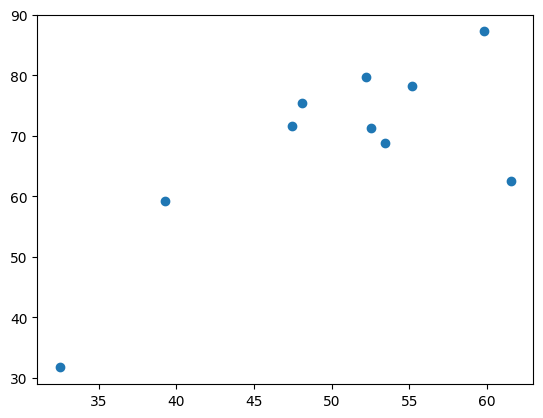

(10,)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = np.array([[32.50234527,31.70700585],
        [53.42680403,68.77759598],
        [61.53035803,62.5623823],
        [47.47563963,71.54663223],
        [59.81320787,87.23092513],
        [55.14218841,78.21151827],
        [52.21179669,79.64197305],
        [39.29956669,59.17148932],
        [48.10504169,75.3312423],
        [52.55001444,71.30087989]])
x_data = data[:,0]
y_data = data[:,1]
plt.scatter(x_data,y_data)
plt.show()
print(x_data.shape)


In [6]:
# 中心化
def zeroMean(dataMat):
    # 按列求平均，即各个特征的平均
    meanVal = np.mean(dataMat, axis=0) 
    newData = dataMat - meanVal
    return newData, meanVal

In [ ]:
#求协方差矩阵
newData,meanVal=zeroMean(data)  
covMat = np.cov(newData, rowvar=0)  # rowvar=False 表示每列是一个特征

#求矩阵的特征值和特征向量
eigVals, eigVects = np.linalg.eig(covMat)

#对特征值排序
eigValIndice = np.argsort(eigVals)
eigValIndice

array([0, 1])

In [15]:
k = 1  # 将降维到一维
#取最大的k个特征值下标
n_eigValIndice = eigValIndice[-1:-(k+1):-1]

#最大的k个特征值对应的特征向量
n_eigVect = eigVects[:,n_eigValIndice]
n_eigVect.shape
# 特征向量的个数就代表降维后的数据维度


(2, 1)

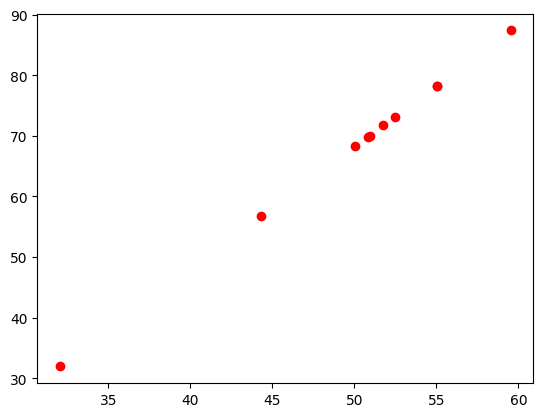

In [17]:
lowDDataMat = np.dot(newData,n_eigVect)
reconMat =np.dot(lowDDataMat,n_eigVect.T) + meanVal


# 重构的数据
x_data = np.array(reconMat)[:,0]
y_data = np.array(reconMat)[:,1]
plt.scatter(x_data,y_data,c='r')
plt.show()